#### CSCA Introduction to Machine Learning: Supervised Learning
## Final Project: Stack Overflow Developer Analysis
***

### Project Summary

This project analyzes annual pay based on various factors using decision tree regression and LightGBM models to predict annual pay and determine which factors have the most impact.

### Motivation:

As an enthusiastic learner of programming, I have always wondered which factors most influence a developer's annual pay. This analysis aims to illuminate these factors, providing insights that could help developers and engineers make informed decisions about their career paths.


### Goal of Analysis:

The primary goal of this analysis is to identify the key factors that influence the annual pay of developers as reported in the Stack Overflow Annual Developer Survey. I will employ various statistical methods and machine learning algorithms to predict annual pay based on variables such as education level, programming languages known, years of experience, and geographic location. This will not only help individuals assess their potential earnings but also guide them in enhancing their skills and qualifications for better compensation.

### Data Source:

The dataset for this analysis is gathered from [Stack Overflow Annual Developer Survey 2023](https://survey.stackoverflow.co/)

It is available to the public as a **.csv file**, and I recommend accessing the page to investigate further by yourself. The size of the original dataset is **158.6 MB**, it includes **89,184 rows** from approximately 90,000 developers worldwide, and provides a rich basis for our analysis with **84 columns**. 

# Data Cleaning

Before doing analysis with the original dataset, clean the data for filtering out inconsistencies and errors to ensure accuracy in the analysis. 

The data clearning process will includes: 

- **Feature Selection:** Identifying and retaining only those features that are relevant for the analysis to improve model performance and interpretability.

- **Handling improper values:** Addressing missing or undefined values (NaN) by deciding whether to impute, replace, or remove them based on their impact and prevalence.

- **Outlier Detection and Filtering:** Identifying data points that significantly deviate from the norm and deciding whether to modify or remove these outliers to prevent skewed results.

- **Data Type Conversions:** Ensuring that all data columns are of the correct data type for analysis, such as converting strings to numeric values or dates to datetime objects.


Details and specific methods for each step will be documented with comments in the code.

### Data Import

Use pandas for importing and handling the dataset and matplotlib for plotting and visualizing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data and save it to df
df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_public.csv")

# Check what the data looks like at the first stage
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
# Check whwat the CompTotal (annual pay) looks like
df['CompTotal'].unique()

array([        nan, 2.85000e+05, 2.50000e+05, ..., 3.55410e+04,
       2.12021e+05, 3.30000e+09])

### Data Cleaning - Feature Selection

Review the dataset structure using the info() method to understand which features are available. From there, select the features that seem likely to be predictors of CompTotal.

Selecting specific features is crucial because it allows us to focus on the most relevant information that impacts the target variable, reducing complexity and improving the efficiency of our model. This process helps in avoiding the "curse of dimensionality," which can degrade model performance due to too many irrelevant or less important features. By concentrating on significant predictors, we enhance model accuracy and simplify the model's interpretability.

In [4]:
# Review the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [5]:
# Select the features that seem likely to be predictors of CompTotal

columns_to_keep = [
    'Age', 'Employment', 'RemoteWork', 'EdLevel',
    'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize','Country','LanguageHaveWorkedWith',
    'PlatformHaveWorkedWith', 'DatabaseHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'OpSysProfessional use',
    'ICorPM', 'Industry',
    'ConvertedCompYearly'
]

In [6]:
# Update df and review
df = df[columns_to_keep]
df.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,PlatformHaveWorkedWith,DatabaseHaveWorkedWith,ToolsTechHaveWorkedWith,OpSysProfessional use,ICorPM,Industry,ConvertedCompYearly
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,HTML/CSS;JavaScript;Python,Amazon Web Services (AWS);Netlify;Vercel,Supabase,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,MacOS;Windows;Windows Subsystem for Linux (WSL),People manager,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end","5,000 to 9,999 employees",United States of America,Bash/Shell (all shells);Go,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,Cargo;Docker;Kubernetes;Make;Nix,MacOS;Other Linux-based,Individual contributor,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Cloudflare;Heroku,PostgreSQL;Redis,Homebrew;npm;Vite;Webpack;Yarn,iOS;iPadOS;MacOS,Individual contributor,NaN,156000.0
4,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,Philippines,HTML/CSS;JavaScript;TypeScript,Amazon Web Services (AWS);Firebase;Heroku;Netl...,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Docker;npm;Webpack;Yarn,Other (Please Specify):,Individual contributor,Other,23456.0


### Data Cleaning - Handling improper values

As observed from the info() output below, there are numerous NaN values and potential outliers in certain features. To prepare for more accurate analysis, we'll clean these improper values. This involves removing or imputing NaN values and identifying and handling outliers. Cleaning these values is critical because improper or missing data can lead to biased or inaccurate results, affecting the reliability of our statistical tests and models. By ensuring data quality through these cleaning steps, we enhance the robustness of our analysis, enabling us to make more precise and trustworthy conclusions based on the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      89184 non-null  object 
 1   Employment               87898 non-null  object 
 2   RemoteWork               73810 non-null  object 
 3   EdLevel                  87973 non-null  object 
 4   YearsCode                87435 non-null  object 
 5   YearsCodePro             66136 non-null  object 
 6   DevType                  76872 non-null  object 
 7   OrgSize                  65043 non-null  object 
 8   Country                  87973 non-null  object 
 9   LanguageHaveWorkedWith   87140 non-null  object 
 10  PlatformHaveWorkedWith   63628 non-null  object 
 11  DatabaseHaveWorkedWith   73435 non-null  object 
 12  ToolsTechHaveWorkedWith  77884 non-null  object 
 13  OpSysProfessional use    78587 non-null  object 
 14  ICorPM                

**Column 0: Age**

As I need integer data type instead of object for decision tree regression and LightGBM models later, let's take a step for taking average value and make the data type to integer.

In [8]:
df['Age'].unique()

array(['18-24 years old', '25-34 years old', '45-54 years old',
       '35-44 years old', 'Under 18 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [9]:
# Importing regular expression library for pattern matching
import re

# Define a function to convert age ranges to their average value
def convert_age_range_to_avg(text):
    # Find all numbers in the string and convert them to integers
    numbers = [int(age) for age in re.findall(r'\d+', text)]
    # Return to average
    return sum(numbers) / len(numbers)

# Remove rows where the age is 'Prefer not to say'
df = df[df['Age'] != 'Prefer not to say']

# Convert to average ages in the 'Age' column
df['Age'] = df['Age'].apply(convert_age_range_to_avg)

**Visualization**

Throughout the data cleaning process, I will create several visualization functions. These will help us identify valuable findings and verify the effectiveness of our filtering, conversion, and other changes made to the data. By integrating visualizations into each step of data cleaning, we can more easily spot inconsistencies, outliers, or unexpected patterns, ensuring that our dataset is well-prepared for analysis.

In [10]:
# Create histogram plot (dtype = int)
def plot_numeric_column(col_name, color='blue'):
    plt.hist(df[col_name], color=color, alpha=0.7)
    plt.title(col_name)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

# Create box plot (dtype = int)
def plot_numeric_column_boxplot(col_name):
    plt.boxplot(df[col_name])
    plt.title(col_name)
    plt.grid(True)
    plt.show()    
    
# Simplifies by limiting the number of categories to a specified maximum. 
# If the number of unique values exceeds max_categories,it goes into a 'Other'
def limit_value_counts(df, column_name, max_categories=15):
    # Counting occurrences of each value
    counts = df[column_name].value_counts()

    # If there are more than max_categories, reduce the number of categories
    if len(counts) > max_categories:
        # Get the top max_categories counts
        top_counts = counts[:max_categories]

        # Sum the counts of all other categories
        other_count = counts[max_categories:].sum()

        # Append the 'Other' category with its count
        top_counts['Other'] = other_count

        return top_counts

    # If not exceeding max_categories, return the original counts
    return counts    
    
    
# Create bar chart (dtype = object)    
def plot_category_column(col_name, color='lightblue', horizontal=False, figsize=(8, 4)):

    # Count the occurrences of each category
    category_counts = limit_value_counts(df, col_name)

    # Create a bar chart
    plt.figure(figsize=figsize) 
    if horizontal:
        plt.barh(category_counts.index, category_counts.values, color=color)
        plt.xlabel('Counts')
    else:
        plt.bar(category_counts.index, category_counts.values, color=color)
        plt.ylabel('Counts')

    # Adding title and labels
    plt.title(col_name)
    

    # Show the plot
    plt.show()

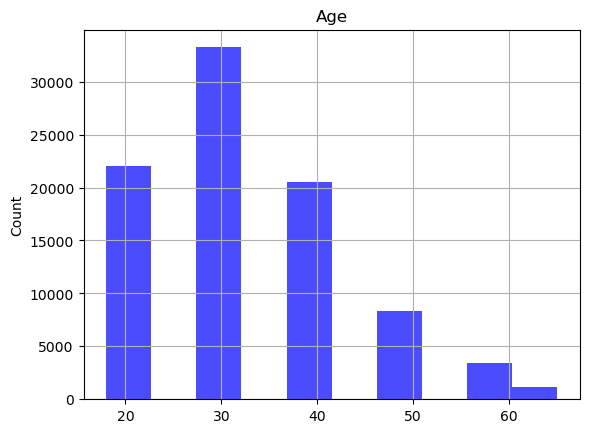

In [11]:
# Plot and review the entities of Age is calculated to average
plot_numeric_column('Age')

**Column 1: Employment**

Since the analysis is focused on 'full-time' employees only, I will filter out other employment types and then drop the 'Employment' column, as all remaining entries will be 'full-time' only. This simplifies the dataset and removes unnecessary data.

In [12]:
df['Employment'].unique()

array([nan, 'Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Student, part-time',
       'Not employed, but looking for work;Student, full-time',
       'Employed, part-time;Student, part-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time', 'I prefer not to say',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Student, part-time',
       'Not employed, but looking for work;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Retired', 'Employed, full-time;Student, full-time',
       'Student, full-time;Student, part-time',
       '

In [13]:
# Leave 'full-time' only
df = df[df['Employment'].str.contains('full-time', na=False)]

# Drop the Employment column since all remaining entities are 'full-time'
df = df.drop(columns=['Employment'])

**Column 2: EdLevel**

Since the analysis is focused on 'Bachelor's degree', 'Master's degree', 'Professional degree' only, I will filter out other educational types and then categorize others to 'Others'.

In [14]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Primary/elementary school',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else'], dtype=object)

In [15]:
# Custom function to transform values
def transform_education(value):
    if 'Bachelor’s degree' in value:
        return 'Bachelor’s degree'
    elif 'Master’s degree' in value:
        return 'Master’s degree'
    elif 'Professional degree' in value:
        return 'Professional degree'
    else:
        return 'Others'

# Apply the function
df['EdLevel'] = df['EdLevel'].apply(transform_education)

In [16]:
# Review if entities in EdLevel is adjusted
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree      31009
Others                 20186
Master’s degree        17103
Professional degree     3138
Name: count, dtype: int64

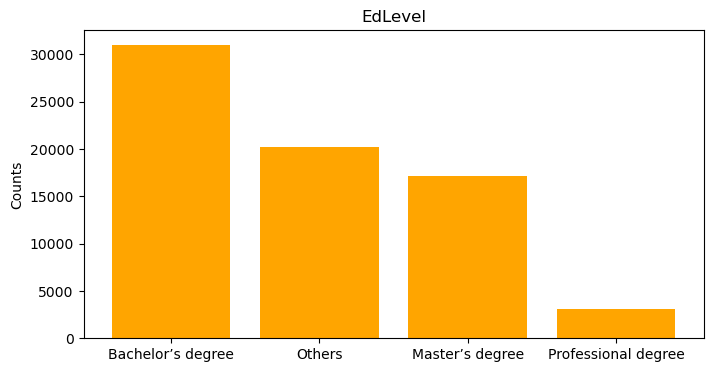

In [17]:
plot_category_column('EdLevel', 'orange')

**Column 3, 4: YearsCode, YearsCodePro**

For these features, I will change the data type from object to integer to facilitate analysis. Additionally, I will modify entries that are not integers; for example, "less than 1 year" will be changed to "1", and "more than 50 years" will be changed to "50". NaN will be removed for sure.

In [18]:
# Check how many NaN in them
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71436 entries, 1 to 89183
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      71436 non-null  float64
 1   RemoteWork               62985 non-null  object 
 2   EdLevel                  71436 non-null  object 
 3   YearsCode                71082 non-null  object 
 4   YearsCodePro             56932 non-null  object 
 5   DevType                  63486 non-null  object 
 6   OrgSize                  56179 non-null  object 
 7   Country                  71436 non-null  object 
 8   LanguageHaveWorkedWith   70915 non-null  object 
 9   PlatformHaveWorkedWith   52321 non-null  object 
 10  DatabaseHaveWorkedWith   59989 non-null  object 
 11  ToolsTechHaveWorkedWith  63999 non-null  object 
 12  OpSysProfessional use    64480 non-null  object 
 13  ICorPM                   40489 non-null  object 
 14  Industry                 34

In [19]:
# Drop NaN from YearsCode and YearsCodePro
df = df.dropna(subset=['YearsCode', 'YearsCodePro'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56889 entries, 1 to 89183
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      56889 non-null  float64
 1   RemoteWork               56888 non-null  object 
 2   EdLevel                  56889 non-null  object 
 3   YearsCode                56889 non-null  object 
 4   YearsCodePro             56889 non-null  object 
 5   DevType                  56801 non-null  object 
 6   OrgSize                  55722 non-null  object 
 7   Country                  56889 non-null  object 
 8   LanguageHaveWorkedWith   56618 non-null  object 
 9   PlatformHaveWorkedWith   43501 non-null  object 
 10  DatabaseHaveWorkedWith   49173 non-null  object 
 11  ToolsTechHaveWorkedWith  51548 non-null  object 
 12  OpSysProfessional use    52762 non-null  object 
 13  ICorPM                   38059 non-null  object 
 14  Industry                 32

In [20]:
df['YearsCode'].unique()

array(['18', '27', '12', '6', '21', '4', '5', '20', '14', '10', '15',
       '11', '3', '24', '8', '13', 'Less than 1 year', '16', '33', '22',
       '32', '28', '40', '17', '7', '29', '19', '9', '38', '26', '2',
       '35', '25', '23', '30', '45', '31', '43', '48', '1', '41', '50',
       '42', '34', '37', '39', '36', '44', 'More than 50 years', '46',
       '49', '47'], dtype=object)

In [21]:
df['YearsCodePro'].unique()

array(['9', '23', '7', '4', '21', '3', '15', 'Less than 1 year', '10',
       '2', '6', '14', '5', '19', '13', '16', '28', '1', '11', '8', '25',
       '32', '24', '17', '29', '12', '20', '18', '30', '27', '43', '22',
       '26', '38', '33', '44', '40', '35', '34', '42', '31', '47', '36',
       '39', '37', 'More than 50 years', '41', '48', '45', '50', '46',
       '49'], dtype=object)

In [22]:
# Change data type from object to integer
# Define function to handle "less than 1 year" and "more than 50 years"
def transform_years(value):
    if 'Less than' in value:
        return '1'
    elif 'More than' in value:
        return '50'
    else:
        return value

df['YearsCode'] = df['YearsCode'].apply(transform_years)
df['YearsCodePro'] = df['YearsCodePro'].apply(transform_years)

# Change object to integer type
df['YearsCode'] = df['YearsCode'].astype('int')
df['YearsCodePro'] = df['YearsCodePro'].astype('int')

In [23]:
# Check if the data is cleaned and data type
df['YearsCode'].value_counts()

YearsCode
10    4756
15    3493
8     3274
20    3176
7     2971
12    2765
6     2702
5     2637
9     2261
13    2121
25    2093
11    1973
14    1880
4     1720
16    1545
30    1535
18    1400
3     1325
17    1268
23    1058
22     975
40     872
35     808
24     755
19     676
2      654
21     621
28     567
27     563
26     545
33     370
32     343
1      338
38     311
29     275
34     244
42     242
37     235
31     207
36     207
45     201
43     169
41     167
39     159
50     141
44     110
48      58
46      57
47      45
49      21
Name: count, dtype: int64

In [24]:
# Check if the data is cleaned and data type
df['YearsCodePro'].value_counts()

YearsCodePro
5     4340
2     4014
10    3965
3     3903
1     3840
4     3606
6     3279
7     3159
8     3086
15    2348
12    2093
9     1910
11    1793
20    1756
13    1453
25    1135
16    1100
14    1058
18    1015
17     985
23     926
22     708
30     654
19     557
24     555
21     467
27     377
26     375
28     337
35     320
33     205
32     202
40     190
29     175
36     149
31     139
34     133
38     122
37     103
39      68
45      52
42      47
41      46
43      40
50      36
44      23
46      16
48      14
47      10
49       5
Name: count, dtype: int64

In [25]:
# Check if it is correctly processed so far
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56889 entries, 1 to 89183
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      56889 non-null  float64
 1   RemoteWork               56888 non-null  object 
 2   EdLevel                  56889 non-null  object 
 3   YearsCode                56889 non-null  int64  
 4   YearsCodePro             56889 non-null  int64  
 5   DevType                  56801 non-null  object 
 6   OrgSize                  55722 non-null  object 
 7   Country                  56889 non-null  object 
 8   LanguageHaveWorkedWith   56618 non-null  object 
 9   PlatformHaveWorkedWith   43501 non-null  object 
 10  DatabaseHaveWorkedWith   49173 non-null  object 
 11  ToolsTechHaveWorkedWith  51548 non-null  object 
 12  OpSysProfessional use    52762 non-null  object 
 13  ICorPM                   38059 non-null  object 
 14  Industry                 32

**Column 5: DevType**

As we are targeting for developer/engineer/scientist only, so let's filter out others, and clear NaN.

In [26]:
df['DevType'].unique()

array(['Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional',
       'Research & Development role', 'Other (please specify):',
       'Developer, mobile', 'Developer, embedded applications or devices',
       'Engineer, data', 'Hardware Engineer', 'Product manager',
       'Academic researcher', 'Developer, game or graphics',
       'Database administrator', 'Developer Experience',
       'Engineering manager', 'Project manager',
       'Cloud infrastructure engineer', 'DevOps specialist',
       'Engineer, site reliability', 'Blockchain', 'Developer Advocate',
       'Educator', 'Scientist', nan, 'Marketing or sales professional',
       'Student'], dtype=object)

In [27]:
# Select entities contain "devloper", "engineer" or "scientist" only
# and filter out NaN values
df = df[df['DevType'].str.contains('developer|engineer|scientist', na=False, case=False)]

In [28]:
# Check if it is correctly processed so far
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47964 entries, 2 to 89183
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      47964 non-null  float64
 1   RemoteWork               47964 non-null  object 
 2   EdLevel                  47964 non-null  object 
 3   YearsCode                47964 non-null  int64  
 4   YearsCodePro             47964 non-null  int64  
 5   DevType                  47964 non-null  object 
 6   OrgSize                  47490 non-null  object 
 7   Country                  47964 non-null  object 
 8   LanguageHaveWorkedWith   47772 non-null  object 
 9   PlatformHaveWorkedWith   37075 non-null  object 
 10  DatabaseHaveWorkedWith   41939 non-null  object 
 11  ToolsTechHaveWorkedWith  43943 non-null  object 
 12  OpSysProfessional use    44547 non-null  object 
 13  ICorPM                   32749 non-null  object 
 14  Industry                 27

**Column 6: OrgSize**

As you will see below, the 'OrgSize' column includes entries like "I don't know" and "Just me - ..." that cannot be directly converted to integers. I will exclude entries with the value "I don't know" and replace "Just me - ..." with "1," as it represents individual freelancers. Additionally, I will convert organizational size ranges to their average values for analysis purposes and filter out any NaN values to ensure data integrity.


In [29]:
 df['OrgSize'].value_counts()

OrgSize
20 to 99 employees                                    10657
100 to 499 employees                                   9849
10,000 or more employees                               6296
1,000 to 4,999 employees                               5775
10 to 19 employees                                     4020
2 to 9 employees                                       4016
500 to 999 employees                                   3607
5,000 to 9,999 employees                               2095
I don’t know                                            799
Just me - I am a freelancer, sole proprietor, etc.      376
Name: count, dtype: int64

In [30]:
# Define a function to convert org size ranges to their average value
def convert_org_range_to_avg(text):
    # Find all numbers in the string and convert them to integers
    numbers = [int(orgsize) for orgsize in re.findall(r'\d+', text)]
    # Return average
    return sum(numbers) / len(numbers)

# Filter "I don't know"
df = df[df['OrgSize'] != 'I don’t know']

# Filter NaN
df = df.dropna(subset=['OrgSize'])

# Replace "Just me..." with "1"
df['OrgSize'] = df['OrgSize'].replace('Just me - I am a freelancer, sole proprietor, etc.', '1')

df['OrgSize'] = df['OrgSize'].apply(convert_org_range_to_avg)

# Check if the data is corrected well
df.head()

,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,PlatformHaveWorkedWith,DatabaseHaveWorkedWith,ToolsTechHaveWorkedWith,OpSysProfessional use,ICorPM,Industry,ConvertedCompYearly
2,49.5,"Hybrid (some remote, some in-person)",Bachelor’s degree,27,23,"Developer, back-end",253.25,United States of America,Bash/Shell (all shells);Go,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,Cargo;Docker;Kubernetes;Make;Nix,MacOS;Other Linux-based,Individual contributor,"Information Services, IT, Software Development...",250000.0
3,29.5,"Hybrid (some remote, some in-person)",Bachelor’s degree,12,7,"Developer, front-end",299.50,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Cloudflare;Heroku,PostgreSQL;Redis,Homebrew;npm;Vite;Webpack;Yarn,iOS;iPadOS;MacOS,Individual contributor,NaN,156000.0
4,29.5,Remote,Bachelor’s degree,6,4,"Developer, full-stack",59.50,Philippines,HTML/CSS;JavaScript;TypeScript,Amazon Web Services (AWS);Firebase;Heroku;Netl...,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Docker;npm;Webpack;Yarn,Other (Please Specify):,Individual contributor,Other,23456.0
5,39.5,Remote,Others,21,21,"Developer, back-end",299.50,United Kingdom of Great Britain and Northern I...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Amazon Web Services (AWS);Cloudflare;Google Cloud,BigQuery;Cloud Firestore;PostgreSQL;Redis,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,MacOS,Individual contributor,Other,96828.0
6,39.5,Remote,Others,4,3,"Developer, full-stack",251.00,United States of America,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,Amazon Web Services (AWS);Digital Ocean,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,Bun;Cargo;Chocolatey;Docker;Homebrew;Kubernete...,MacOS,Individual contributor,"Information Services, IT, Software Development...",135000.0


**Column 7: Country**

The data has no NaN, so I will skip to the next.

**Column 8, 9, 10, 11, 12: LanguageHaveWorkedWith, PlatformHaveWorkedWith, DatabaseHaveWorkedWith, ToolsTechHaveWorkedWith, OpSysProfessional use**

As you saw above, the data in the five columns includes many strings separated by ";" (e.g. HTML/CSS;JavaScript;TypeScript). We need to count them for getting integer data.

In [31]:
# Define count_skills for counting skills
def count_skills(skills):
    if pd.isna(skills):
        # if NaN, return 0
        return 0
    else:
        # Count how many skills they have
        return len(skills.split(';'))

# Apply this function to each element in the DataFrame
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].apply(count_skills)
df['PlatformHaveWorkedWith'] = df['PlatformHaveWorkedWith'].apply(count_skills)
df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].apply(count_skills)
df['ToolsTechHaveWorkedWith'] = df['ToolsTechHaveWorkedWith'].apply(count_skills)
df['OpSysProfessional use'] = df['OpSysProfessional use'].apply(count_skills)

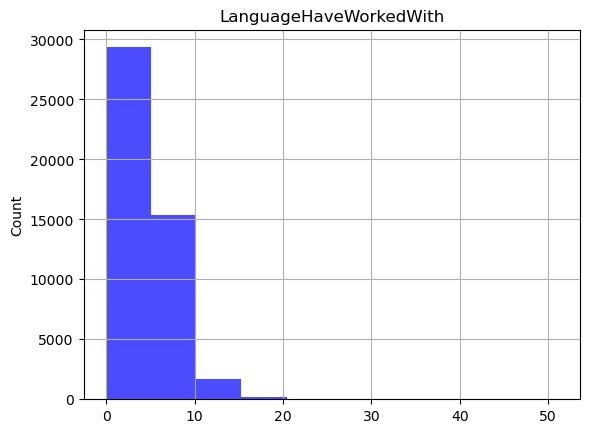

In [32]:
plot_numeric_column('LanguageHaveWorkedWith')

Let's examine the bar chart displayed above. 

It reveals that approximately 30,000 individuals have experience with 0 to 5 programming languages, representing the highest percentage within the dataset. Additionally, it is noteworthy that only a small number of people have worked with more than 10 programming languages.

In [33]:
# Check if the above is correctly processed so far

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46691 entries, 2 to 89183
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      46691 non-null  float64
 1   RemoteWork               46691 non-null  object 
 2   EdLevel                  46691 non-null  object 
 3   YearsCode                46691 non-null  int64  
 4   YearsCodePro             46691 non-null  int64  
 5   DevType                  46691 non-null  object 
 6   OrgSize                  46691 non-null  float64
 7   Country                  46691 non-null  object 
 8   LanguageHaveWorkedWith   46691 non-null  int64  
 9   PlatformHaveWorkedWith   46691 non-null  int64  
 10  DatabaseHaveWorkedWith   46691 non-null  int64  
 11  ToolsTechHaveWorkedWith  46691 non-null  int64  
 12  OpSysProfessional use    46691 non-null  int64  
 13  ICorPM                   31982 non-null  object 
 14  Industry                 27

**Column 13: ICorPM**

As you can deduce from the feature name, this column predominantly includes entries such as 'Individual contributor' and 'People manager'. Instead of deleting NaN values, which represent missing information, I will replace them with 'Others'. 
This approach prevents the reduction of our dataset size and allows us to maintain a comprehensive analysis across all entries. By categorizing these unknown or unspecified roles as 'Others', we can include them in broader analyses without biasing our results towards only the specified categories, ensuring a more inclusive dataset representation.

In [34]:
df['ICorPM'].unique()

array(['Individual contributor', nan, 'People manager'], dtype=object)

In [35]:
# Swith NaN to 'Others'
df['ICorPM'] = df['ICorPM'].fillna('Others')

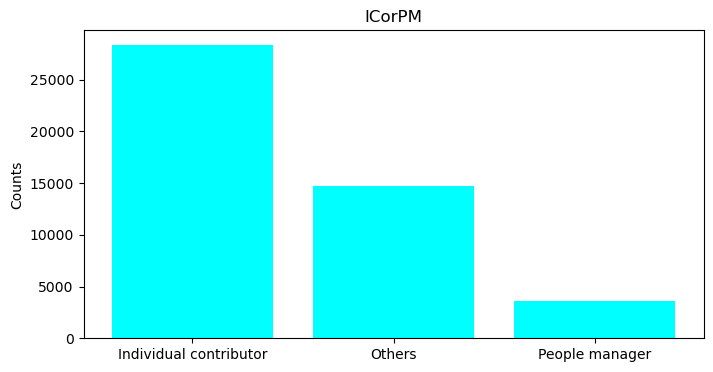

In [36]:
plot_category_column('ICorPM', 'cyan')

**Column 14: Industry**

I will switch NaN to 'Unknown'.

In [37]:
df['Industry'].unique()

array(['Information Services, IT, Software Development, or other Technology',
       nan, 'Other', 'Financial Services',
       'Manufacturing, Transportation, or Supply Chain',
       'Retail and Consumer Services', 'Higher Education', 'Insurance',
       'Healthcare', 'Oil & Gas', 'Advertising Services',
       'Legal Services', 'Wholesale'], dtype=object)

In [38]:
df['Industry'] = df['Industry'].fillna('Unknown')

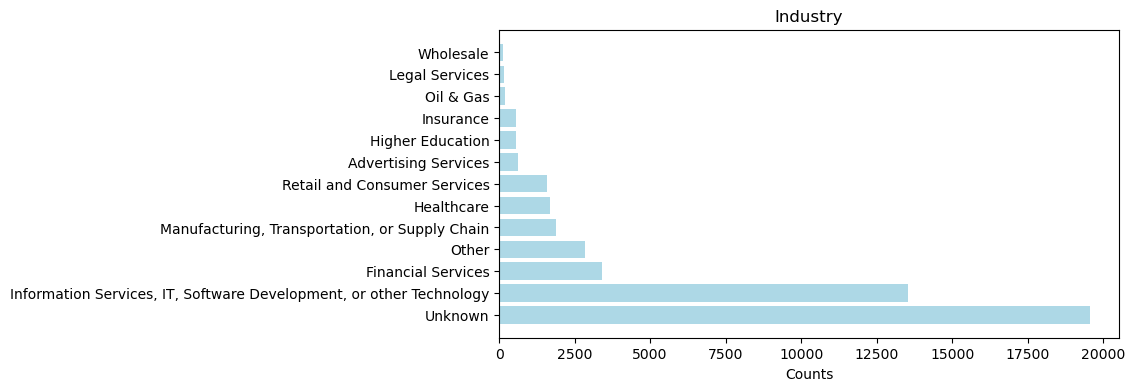

In [39]:
plot_category_column('Industry', 'lightblue', True, (8, 4))


Referring to the bar chart above, it is noted that approximately 20,000 individuals have disclosed the industry in which they are employed. Unfortunately, a significant number remains unspecified.

However, the chart reveals that over 12,500 individuals are employed in the IT and software development industry.

**Column 15: ConvertedCompYearly**

Currently, this column contains only 36,204 non-null values out of a potential 46,691, indicating a substantial number of missing entries. I will remove these gaps by deleting all rows where this column is NaN. 

Additionally, I will use the describe() method to review the statistical summary of the column, which will help identify any unrealistic numbers that could be considered outliers. These outliers will then be filtered out to ensure the accuracy of our data analysis.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46691 entries, 2 to 89183
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      46691 non-null  float64
 1   RemoteWork               46691 non-null  object 
 2   EdLevel                  46691 non-null  object 
 3   YearsCode                46691 non-null  int64  
 4   YearsCodePro             46691 non-null  int64  
 5   DevType                  46691 non-null  object 
 6   OrgSize                  46691 non-null  float64
 7   Country                  46691 non-null  object 
 8   LanguageHaveWorkedWith   46691 non-null  int64  
 9   PlatformHaveWorkedWith   46691 non-null  int64  
 10  DatabaseHaveWorkedWith   46691 non-null  int64  
 11  ToolsTechHaveWorkedWith  46691 non-null  int64  
 12  OpSysProfessional use    46691 non-null  int64  
 13  ICorPM                   46691 non-null  object 
 14  Industry                 46

In [41]:
# Drop NaN from ConvertedCompYearly column
df = df.dropna(subset=['ConvertedCompYearly'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36204 entries, 2 to 89171
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      36204 non-null  float64
 1   RemoteWork               36204 non-null  object 
 2   EdLevel                  36204 non-null  object 
 3   YearsCode                36204 non-null  int64  
 4   YearsCodePro             36204 non-null  int64  
 5   DevType                  36204 non-null  object 
 6   OrgSize                  36204 non-null  float64
 7   Country                  36204 non-null  object 
 8   LanguageHaveWorkedWith   36204 non-null  int64  
 9   PlatformHaveWorkedWith   36204 non-null  int64  
 10  DatabaseHaveWorkedWith   36204 non-null  int64  
 11  ToolsTechHaveWorkedWith  36204 non-null  int64  
 12  OpSysProfessional use    36204 non-null  int64  
 13  ICorPM                   36204 non-null  object 
 14  Industry                 36

In [42]:
df['ConvertedCompYearly'].describe()

count    3.620400e+04
mean     9.523175e+04
std      1.704086e+05
min      1.000000e+00
25%      4.422800e+04
50%      7.496300e+04
75%      1.200000e+05
max      1.761292e+07
Name: ConvertedCompYearly, dtype: float64

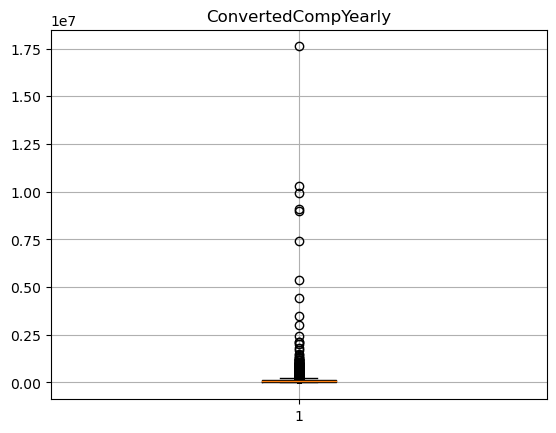

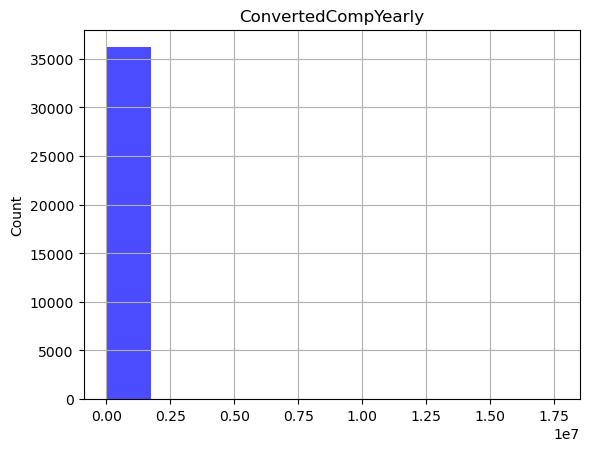

In [43]:
plot_numeric_column_boxplot('ConvertedCompYearly')
plot_numeric_column('ConvertedCompYearly')

As observed from the plot charts above, there are apparent outliers that may impact our analysis. To ensure more accurate results, we will filter out these outliers from the dataset.

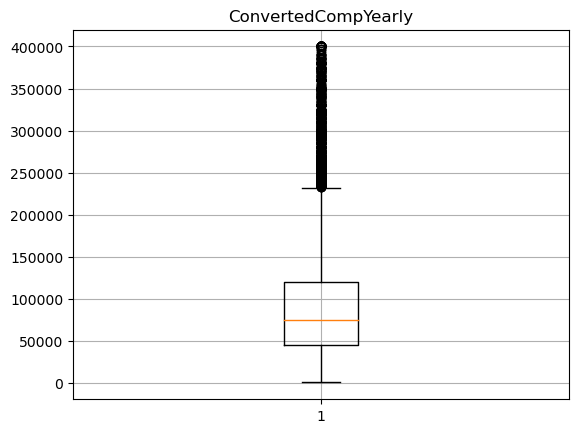

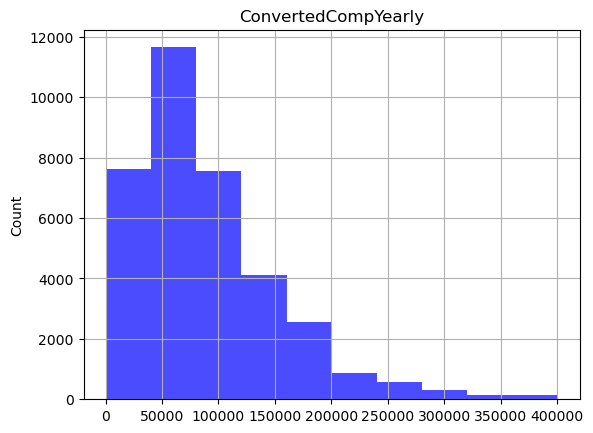

In [44]:
# Handle outliers as it contains improper values will impact on analysis
# Define percentiles
lower_percentile = df['ConvertedCompYearly'].quantile(0.01)
upper_percentile = df['ConvertedCompYearly'].quantile(0.99)

# Filter out outliers
df = df[(df['ConvertedCompYearly'] >= lower_percentile) & (df['ConvertedCompYearly'] <= upper_percentile)]

# Check the filter worked properly
plot_numeric_column_boxplot('ConvertedCompYearly')
plot_numeric_column('ConvertedCompYearly')

In [45]:
# Final check for data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35530 entries, 2 to 89171
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      35530 non-null  float64
 1   RemoteWork               35530 non-null  object 
 2   EdLevel                  35530 non-null  object 
 3   YearsCode                35530 non-null  int64  
 4   YearsCodePro             35530 non-null  int64  
 5   DevType                  35530 non-null  object 
 6   OrgSize                  35530 non-null  float64
 7   Country                  35530 non-null  object 
 8   LanguageHaveWorkedWith   35530 non-null  int64  
 9   PlatformHaveWorkedWith   35530 non-null  int64  
 10  DatabaseHaveWorkedWith   35530 non-null  int64  
 11  ToolsTechHaveWorkedWith  35530 non-null  int64  
 12  OpSysProfessional use    35530 non-null  int64  
 13  ICorPM                   35530 non-null  object 
 14  Industry                 35

### Conclusion of Data Cleaning

The data cleaning process has significantly refined our dataset, reducing the total number of columns from 84 to 16 and focusing on the most relevant features for our analysis. This reduction was achieved by removing columns with excessive missing values, and those that were not crucial for addressing our research questions. The resultant dataset now contains complete records for 35,530 entries, each fully populated without any missing values across all fields.

***Key changes and findings include:***

- **Column Reduction:** The dataset was streamlined by removing a majority of the original columns that either contained too many missing values or were irrelevant to the primary analysis goals.

- **Data Type Conversion:** Several columns such as 'YearsCode', 'PlatformHaveWorkedWith', 'DatabaseHaveWorkedWith', 'ToolsTechHaveWorkedWith', and 'OpSysProfessional use' were converted from objects to integers to facilitate quantitative analysis.

- **Handling Missing Data:** All NaN values were either filled with plausible values or the rows were excluded, depending on the column's significance and the amount of missing data. This has ensured a cleaner and more analyzable dataset.

- **Normalization of Entries:** Columns like 'ICorPM' and 'Industry' were standardized to have consistent entries, reducing ambiguity in the data.

The cleaned dataset now presents a more compact, manageable, and analyzable format, suitable for in-depth analysis aimed at uncovering insights that were previously obfuscated by the sheer volume and messiness of the data.

Let's move on to the Exploratory Data Analysis (EDA) stage.


# Exploratory Data Analysis (EDA)

In this section, I will conduct a comprehensive exploratory analysis to uncover patterns, trends, and relationships within the dataset. The visualizations planned include:

- **Correlation Matrix**: To identify and visualize the strength of relationships between different variables.
- **Heatmap**: To enhance the correlation matrix with colors for better readability and understanding.
- **Histogram**: To observe the distribution of various variables and check for skewness, peaks, and data spread.
- **Scatter Plot**: To explore the relationships between pairs of variables and identify any potential correlations or outliers.
- **Box Plot**: To visualize statistical summaries of various attributes and detect outliers.

Each visualization will be accompanied by a detailed explanation of its purpose and the insights it provides. This analysis will help in understanding the underlying structure of the data and drive further analysis.

After the visualizations, I will summarize the key findings, discuss the implications of the analysis, and suggest possible next steps based on the insights gained from the EDA.


### Correlation Matrix

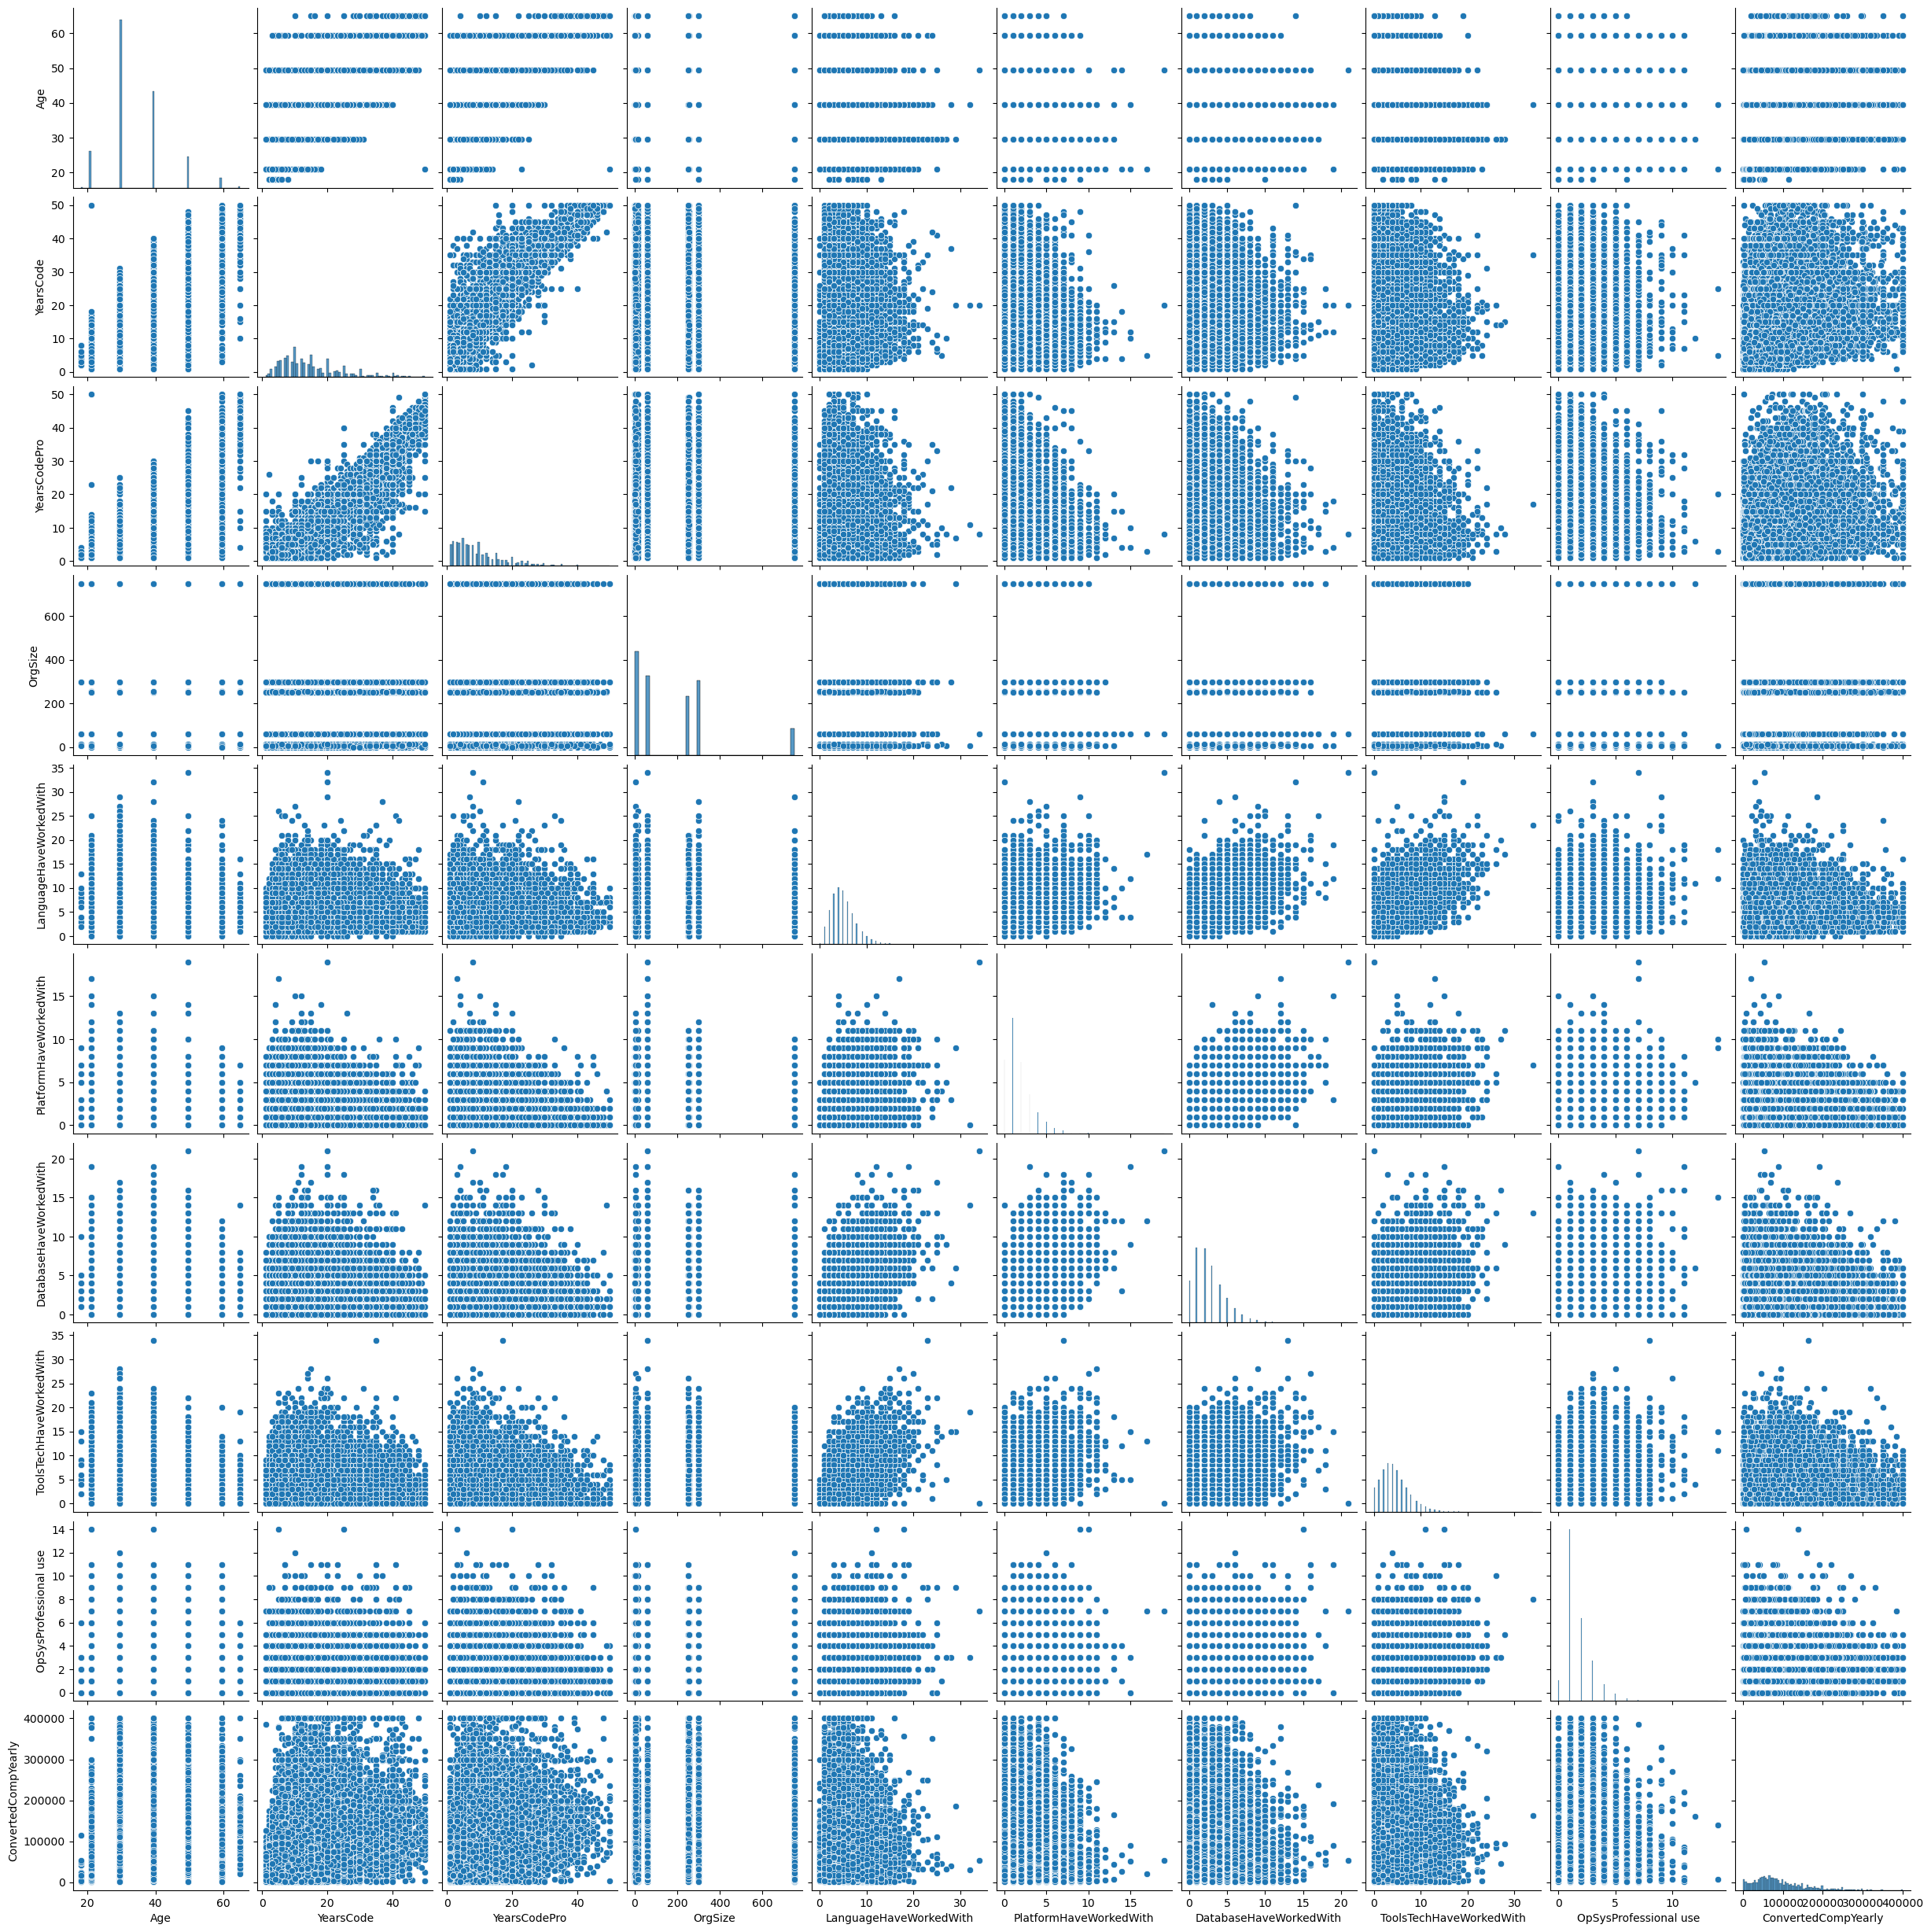

In [46]:
import seaborn as sns
import warnings

# Ingore redundant warning
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

# Create pair plot of df
sns.pairplot(df)
plt.show()

### Correlation Heatmap

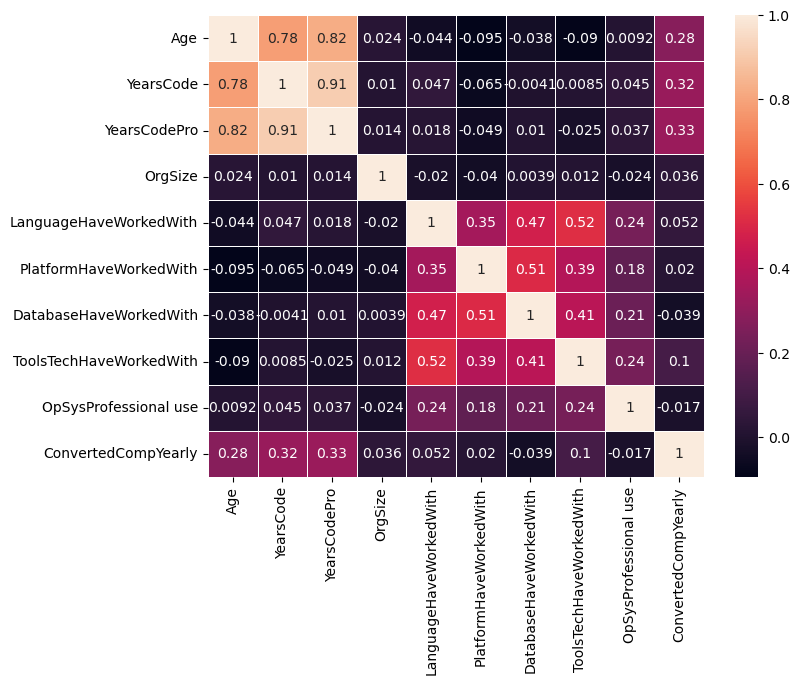

In [47]:
# Adjust fig size for good looking
plt.figure(figsize=(8, 6))

# Create heatmap with correlation value
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5)
plt.show()

**Analysis:**

Our examination of the correlation matrix revealed that the numeric features `Age`, `YearsCode`, and `YearsCodePro` are the most relevant to predicting total compensation. These features, however, display some degree of collinearity. Despite this, we plan to use tree-based models in subsequent analyses, which are well-suited to managing such collinearity without significantly impacting model performance. On the other hand, the number of skills/technologies a developer reports appears to have a weak correlation with total pay, suggesting it may be less influential in predicting compensation outcomes. This insight will guide our feature selection and model training strategies moving forward.

### Histogram

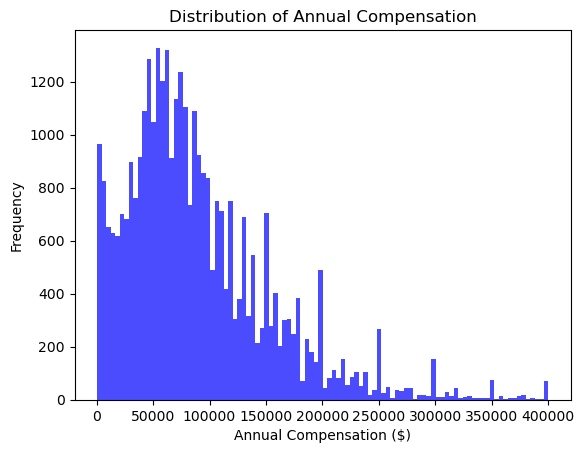

In [48]:
plt.hist(df['ConvertedCompYearly'], bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Annual Compensation')
plt.xlabel('Annual Compensation ($)')
plt.ylabel('Frequency')
plt.show()

**Analysis:**

We can observe that the distribution is right-skewed, indicating that a larger number of individuals receive lower compensation, while fewer individuals earn higher salaries.

The highest frequency of compensation falls within the lower salary brackets, with a notable peak at the lower end of the spectrum. This suggests that the most common salary range is on the lower end, with a gradual decrease in frequency as compensation increases. The long tail to the right demonstrates that while there are individuals earning higher salaries, they constitute a smaller proportion of the dataset.

This distribution could be typical in industries where entry-level and mid-level positions are more prevalent than high-paying senior roles. 

### Scatter Plot

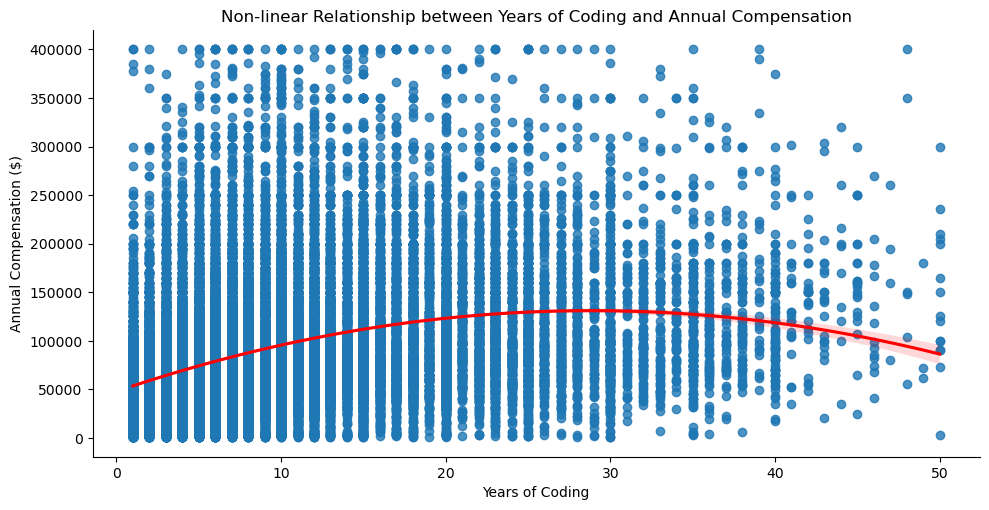

In [49]:
sns.lmplot(x='YearsCodePro', y='ConvertedCompYearly', data=df, order=2, aspect=2, line_kws={'color': 'red'})
plt.xlabel('Years of Coding')
plt.ylabel('Annual Compensation ($)')
plt.title('Non-linear Relationship between Years of Coding and Annual Compensation')
plt.show()

**Analysis:**

The red trend line appears to be a polynomial fit, suggesting a non-linear relationship. The line shows that annual compensation tends to increase with more years of coding experience, but not in a linear fashion. The curve's concave shape indicates that the rate of increase in compensation slows down after a certain number of years.

The plot displays some potential outliers, particularly in the compensation axis where some points are significantly higher than the general trend. These could represent special cases in the data.

The general trend indicates that while there is an increase in annual compensation with more years of coding, the increase does not keep the same pace throughout one's career, and after a certain point, additional experience may yield diminishing returns in terms of salary growth.

### Box Plot

The corr() method enables us to examine correlations exclusively among numeric data. To explore the relationships between categorical and numerical data (e.g., ConvertedCompYearly), we can use a box plot. This visualization effectively illustrates these relationships by displaying variations within each category.

#### By Industry

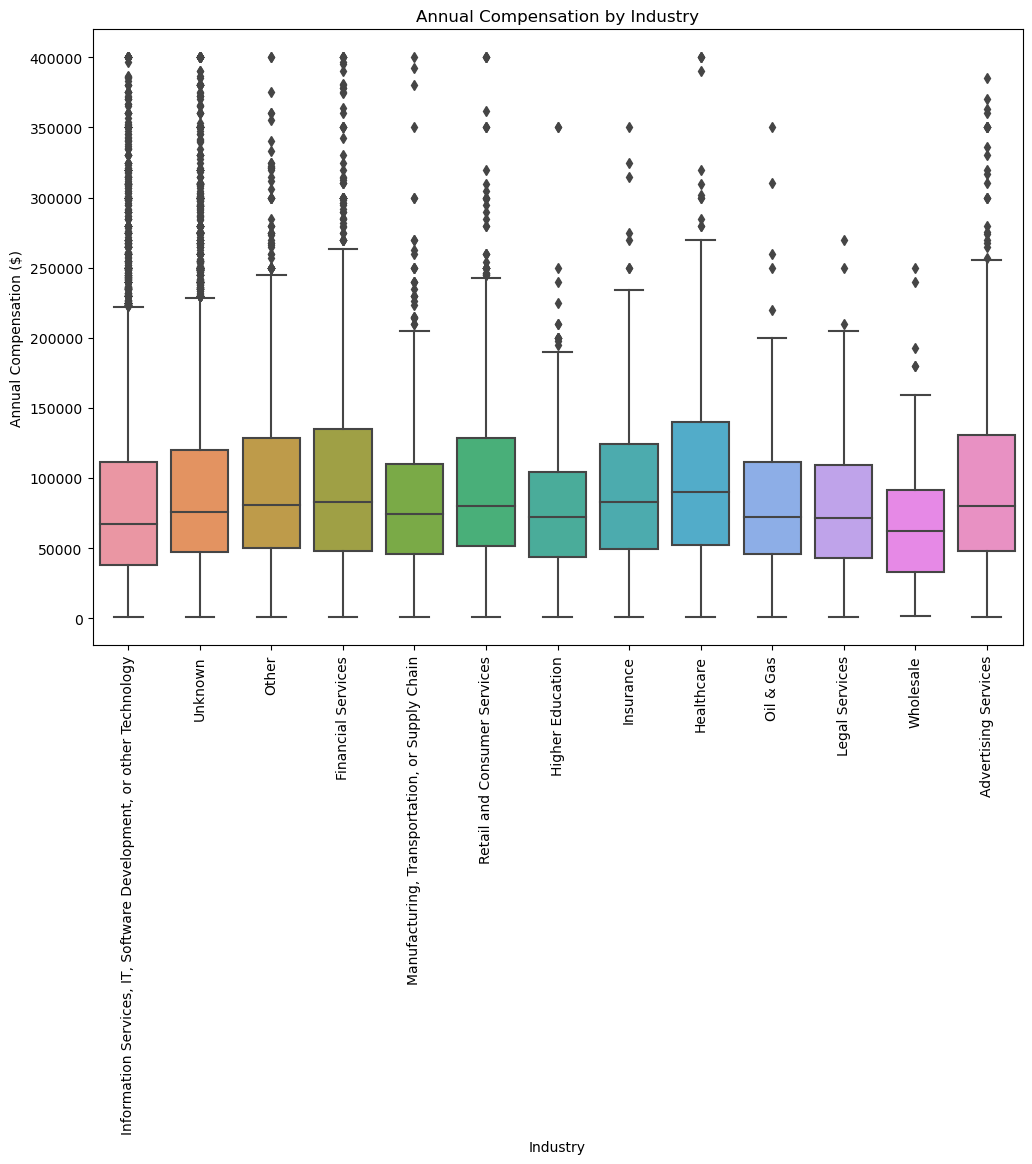

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Industry', y='ConvertedCompYearly', data=df)
plt.xticks(rotation=90)
plt.title('Annual Compensation by Industry')
plt.xlabel('Industry')
plt.ylabel('Annual Compensation ($)')
plt.show()

#### By DevType

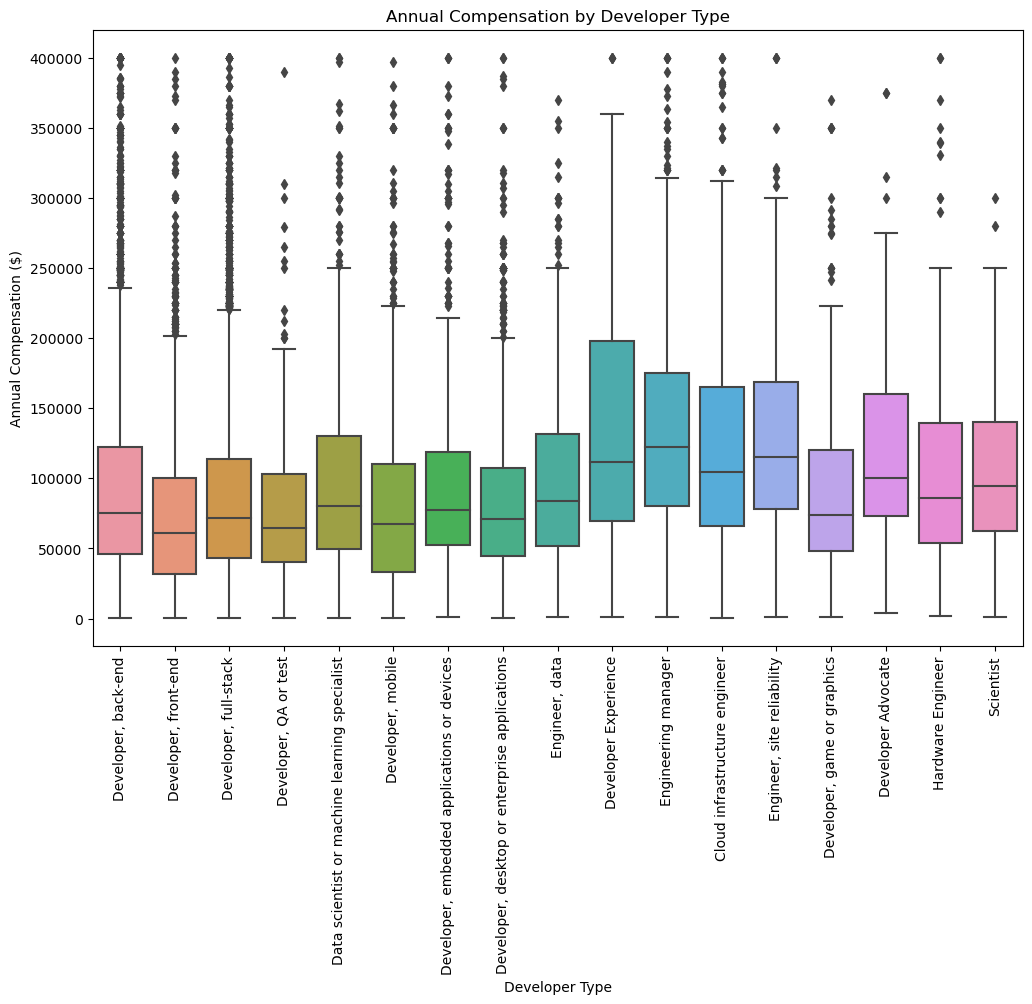

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df)
plt.xticks(rotation=90)
plt.title('Annual Compensation by Developer Type')
plt.xlabel('Developer Type')
plt.ylabel('Annual Compensation ($)')
plt.show()

**Analysis**

We observed that categorical columns such as DevType and Industry exhibit varied pay distributions. These could serve as effective features for training the model.

### Conclusion of Exploratory Data Analysis

The exploratory data analysis revealed significant insights into the factors influencing total compensation (`ConvertedCompYearly`). Our examination of the numerical features identified only a limited number with meaningful correlations to the target variable. This suggests that total compensation is not heavily dependent on these numerical factors alone.

Further analysis using boxplots of categorical features indicates strong associations between these variables and the target compensation. This observation underscores the potential impact of categorical factors such as developer type, industry, or other factors on the total compensation.

Given the absence of a consistent linear relationship between the key numerical features and the target variable, a linear model may not adequately capture the complexities of our data. Therefore, we propose the use of non-linear regression models for training. These models are better suited to handle the intricate relationships and interactions within our dataset, potentially leading to more accurate predictions of total compensation.


# Models

In our exploration of models to predict annual compensation based on various features, I will employ **three tree-based machine learning models: Decision Tree Regression, Random Forest Regressor, and LightGBM.**

Tree-based models are inherently non-linear and capable of capturing non-linear relationships within datasets. Despite identifying some **collinearity** among the features (`Age`, `YearCode`, `YearCodePro`), we will include these collinear variables in our models. Tree-based models, due to their structure, are generally robust to collinearity and can handle it without significant detriment to model performance. This approach allows us to retain the full breadth of data for a more comprehensive analysis. 

As part of our **feature engineering** efforts, we will use **one-hot encoding** to transform categorical columns, making them suitable for model input. 

We will begin with the **Decision Tree** because it is straightforward and provides a visual representation of how tree-based models process data. Following this, we will advance to the more robust **Random Forest** model, which typically outperforms single tree models due to its ensemble approach. Lastly, we will utilize the state-of-the-art **LightGBM** model, which is designed to achieve optimal performance for this task. For the latter two, more sophisticated models, we will employ **hyperparameter tuning** to enhance their efficacy.


### Decision Tree

We begin with a Decision Tree Regression, a model that captures non-linear relationships well. This model is particularly useful when we need to understand the decision-making process, as it provides clear insights into feature importance and decision paths. 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [53]:
X = df.drop(columns=['ConvertedCompYearly'])
y = df['ConvertedCompYearly']

In [54]:
# Encoding categorical data
# Specify the column to encode
categorical_features = ['RemoteWork', 'EdLevel', 'DevType', 'Country', 'ICorPM', 'Industry']
one_hot_encoder = OneHotEncoder()

# Using ColumnTransformer to apply the encoder
preprocessor = ColumnTransformer(transformers=[
    ('cat', one_hot_encoder, categorical_features)], remainder='passthrough')

# Applying the preprocessing to feature matrix
X_encoded = preprocessor.fit_transform(X)

In [55]:
import math

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(
    max_depth=10,               # Controls the maximum depth of the tree
    min_samples_split=20,      # The minimum number of samples required to split an internal node
    min_samples_leaf=10,       # The minimum number of samples required to be at a leaf node
    random_state=42
)

# Training the model
dt_regressor.fit(X_train, y_train)

# Making predictions
predictions = dt_regressor.predict(X_test)

# Evaluating the model
dt_mse = mean_squared_error(y_test, predictions)
dt_rmse = math.sqrt(dt_mse)
print(f'Root Mean Squared Error: ${dt_rmse:,.2f}')

Root Mean Squared Error: $43,660.04


In [56]:
from sklearn.metrics import r2_score

dt_r_squared = r2_score(y_test, predictions)
print(f'R-squared: {dt_r_squared}')

R-squared: 0.5579926916839313


#### Feature importances

Let's summarize which features are considered important by the model.

In [57]:
# Extracting feature importances
feature_importances = dt_regressor.feature_importances_

# Creating a DataFrame to view the feature names and their importance scores
features = pd.DataFrame({
    'Feature': preprocessor.get_feature_names_out().tolist(),
    'Importance': feature_importances
})

# Sorting the DataFrame by importance in descending order
features = features.sort_values(by='Importance', ascending=False)

# Printing the feature importances
print("Top 20 Feature Importances:")
print(features[:20])

Top 20 Feature Importances:
                                               Feature  Importance
178              cat__Country_United States of America    0.614423
204                            remainder__YearsCodePro    0.151327
205                                 remainder__OrgSize    0.032387
163                           cat__Country_Switzerland    0.020662
51                                 cat__Country_Canada    0.020552
176  cat__Country_United Kingdom of Great Britain a...    0.020177
76                                cat__Country_Germany    0.012351
32                              cat__Country_Australia    0.011521
93                                 cat__Country_Israel    0.009878
16                  cat__DevType_Developer, full-stack    0.009799
209                 remainder__ToolsTechHaveWorkedWith    0.008731
193  cat__Industry_Information Services, IT, Softwa...    0.007570
87                                  cat__Country_India    0.007528
207                  remainder__Pl

Based on the results of the feature importances analysis from the Decision Tree Regressor, the **country** in which a developer resides emerges as the most significant predictor of annual compensation, particularly for those in the United States of America, which alone accounts for over 61% of the model's predictive power. Other notable countries include Switzerland, Canada, the United Kingdom, Germany, Australia, and Israel, indicating geographic location's substantial influence on salary differences.

Professional experience, represented by **YearsCodePro**, is the second most influential feature, significantly affecting compensation predictions. Other factors like organization size (**OrgSize**), and the range of tools and technologies developers have worked with (**ToolsTechHaveWorkedWith**), also play important roles but to a lesser extent.

#### Decision Tree Visualization

The visualization below illustrates the decision-making process of this simple tree model. From this visualization, we can intuitively understand how the tree model works to perform regression tasks.

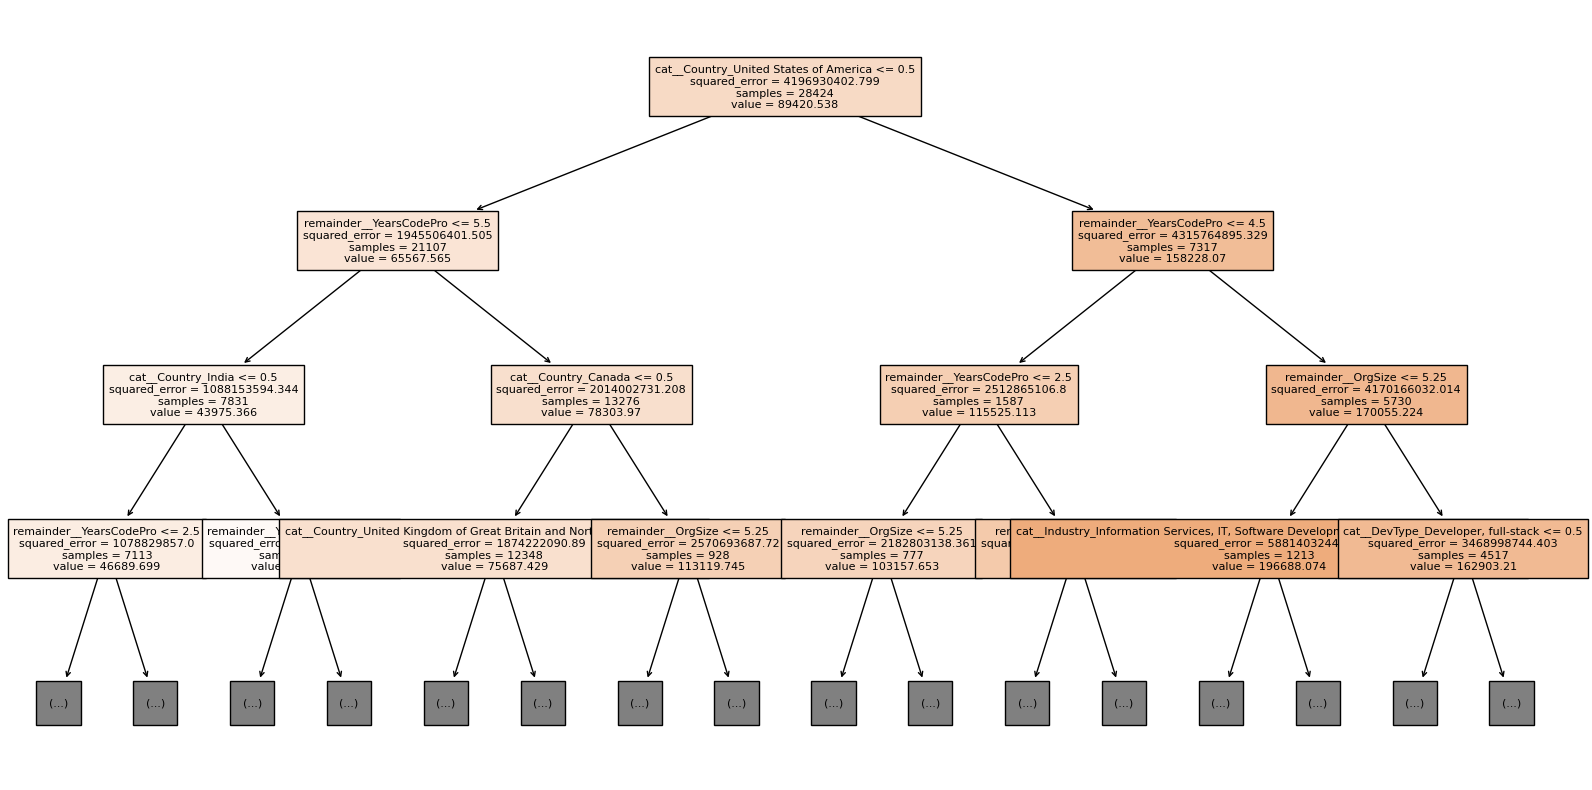

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))  # Set the size of the figure (you can adjust the values to suit your needs)
plot_tree(
    dt_regressor,
    filled=True,
    feature_names=preprocessor.get_feature_names_out().tolist(),
    max_depth=3,
    fontsize=8
)
plt.show()

### Random Forest Regressor

Secondly, we employ the RandomForest Regressor, an ensemble learning method. Random forests help improve predictive accuracy and control overfitting by averaging multiple decision trees that individually may have high variance. This model naturally performs well in the presence of multicollinear features due to the feature sampling in the construction of trees.

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf_regressor = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(rf_regressor, param_distributions=param_dist, n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_rf_regressor = random_search.best_estimator_

# Best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Make predictions with the best model
rf_predictions = best_rf_regressor.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = math.sqrt(rf_mse)
print(f'Root Mean Squared Error: ${rf_rmse:,.2f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 40}
Root Mean Squared Error: $40,261.11


In [61]:
rf_r_squared = r2_score(y_test, rf_predictions)
print(f'R-squared: {rf_r_squared}')

R-squared: 0.6241343713956344


### LightGBM

Our last model, LightGBM, is a gradient boosting framework that uses tree-based learning algorithms and is designed for distributed and efficient training. LightGBM handles large sizes of data and is quite fast, which makes it a viable option for large datasets. 

Gradient boosting models, including LightGBM, are less likely to be affected by multicollinearity due to their sequential nature where subsequent trees learn from the mistakes of the previous ones.

In [62]:
import lightgbm as lgb
import optuna
import logging

# Set the logging level to WARNING to suppress detailed trial output
logging.getLogger('optuna').setLevel(logging.WARNING)

def objective(trial):
    param = {
        'verbose': -1,
        'metric': 'mse',
        'boosting_type': 'gbdt',  # Standard GBDT model
        'objective': 'regression',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'sub_feature': trial.suggest_float('sub_feature', 0.4, 0.9),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'min_data': trial.suggest_int('min_data', 30, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'feature_pre_filter': False,  # Ensure no pre-filtering happens
        'force_row_wise': True,
    }
    gbm = lgb.train(param, d_train, 100)  # Number of boosting rounds, consider adding early_stopping_rounds
    preds = gbm.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = math.sqrt(mse)
    return rmse

# Create LightGBM dataset
d_train = lgb.Dataset(X_train, label=y_train)

# Setting up the parameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  # You can change the number of trials

# Print the best parameters
print('Best parameters:', study.best_params)
print('Best RMSE:', study.best_value)

# Train the model with the best parameters
best_params = study.best_params
best_params.update({
    'verbose': -1,
    'metric': 'mse',
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'force_row_wise': True,
})
lgb_model = lgb.train(best_params, d_train, 100)  # Number of boosting rounds

# Predict on test data
y_pred = lgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
lgb_rmse = math.sqrt(mse)
print(f'Root Mean Squared Error: ${lgb_rmse:,.2f}')

Best parameters: {'learning_rate': 0.08140208585404544, 'sub_feature': 0.7717182627875568, 'num_leaves': 80, 'min_data': 42, 'max_depth': 16}
Best RMSE: 39248.3984053143
Root Mean Squared Error: $39,248.40


In [63]:
lgb_r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {lgb_r_squared}')

R-squared: 0.6428053074219497


## Results and Analysis

Let's start by summarizing the final results we obtained from the previous section.


In [64]:
# Final results
rmses = [dt_rmse, rf_rmse, lgb_rmse]
r_squareds = [dt_r_squared, rf_r_squared, lgb_r_squared]

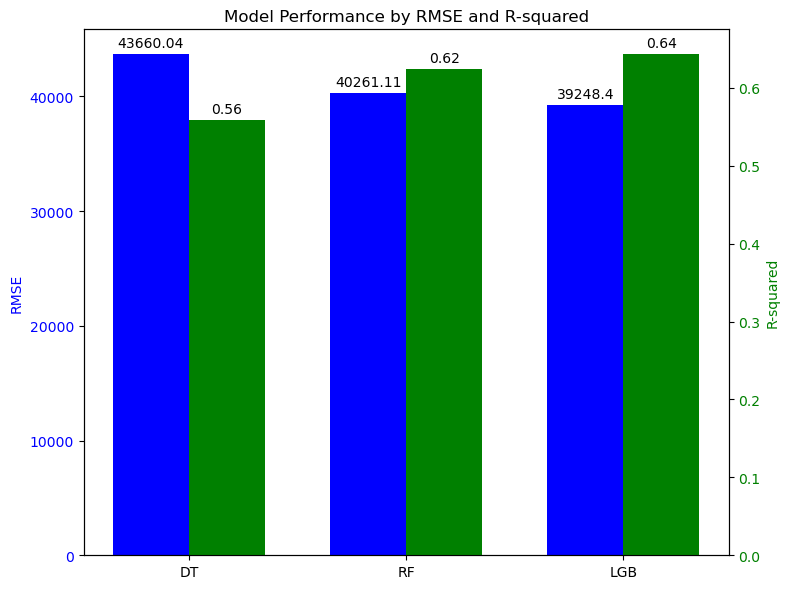

In [65]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['DT', 'RF', 'LGB']  # Model abbreviations
x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting RMSE values on the primary y-axis
rects1 = ax1.bar(x - width/2, rmses, width, label='RMSE', color='b')
ax1.set_ylabel('RMSE', color='b')
ax1.set_title('Model Performance by RMSE and R-squared')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.tick_params(axis='y', labelcolor='b')

# Creating a secondary y-axis for R-squared values
ax2 = ax1.twinx()
rects2 = ax2.bar(x + width/2, r_squareds, width, label='R-squared', color='g')
ax2.set_ylabel('R-squared', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Function to label the bars
def autolabel(rects, axis):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axis.annotate('{}'.format(round(height, 2)),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2)

fig.tight_layout()
plt.show()


**Summary**

The Decision Tree model has the highest RMSE, suggesting it has the poorest fit among the three models. Its R-squared value is also the lowest, indicating that it explains the least amount of variance in the target variable.

The Random Forest model shows an improvement over the DT model with a lower RMSE, which means it generally predicts the target variable more accurately. It also has a higher R-squared value, indicating it explains more variance than the DT model.

The LightGBM model appears to have the best performance of the three, with the lowest RMSE, suggesting the most accurate predictions. Its R-squared value is the highest, indicating it accounts for a greater proportion of the variance in the target variable compared to DT and RF.

Overall, the LightGBM model outperforms the other two models in terms of both predictive accuracy and variance explanation, making it the preferred model based on this chart.




**Note**

In accordance with the project requirements, I have extensively utilized **visualizations** to enhance the interpretability of our models and the clarity of our results. The decision tree visualization provides a clear and intuitive understanding of how decisions are made within the model, illustrating the path from features to outcome. 

I have also explored **different evaluation metrics** to assess model performance comprehensively. Beyond the primary metric of Root Mean Squared Error (RMSE), I analyzed the Mean Absolute Error (MAE) and R-squared values to provide a more nuanced view of model accuracy and fit. These metrics helped in identifying the strengths and weaknesses of each model under different scenarios.

Throughout the analysis, I engaged in an **iterative process of training, evaluating, and refining** our models. This approach included tuning hyperparameters and experimenting with feature selections to optimize performance. The iterative refinements were guided by the evaluation metrics, which indicated improvements in accuracy and the ability to generalize across the testing data. These cycles of improvement were crucial in developing robust models that not only perform well statistically but also align closely with real-world expectations of pay scales in the tech industry.

By adhering to these methods, I have ensured a rigorous analytical process that meets the educational objectives and provides a solid foundation for predictive accuracy and reliability.

## Discussion and Conclusion

This analysis has revealed that the **country of residence is the most significant factor** influencing annual pay, with the number of years spent coding professionally being the second most influential factor. Contrary to our initial hypotheses, other variables such as age, remote work status, and programming languages used did not exhibit a strong relationship with annual compensation. This indicates that while certain demographic and professional characteristics are key predictors of pay, the expected influence of work environment and technical skills was not as pronounced.

*Despite the comprehensive nature of our dataset, the variability in annual pay suggests the presence of outliers or unaccounted factors that could be distorting the observed relationships.* 

**To enhance the reliability and precision of our findings, I recommend the following steps for future improvement:**

- **Outlier Analysis and Management:** Implement more robust methods to identify and filter outliers. This could involve using statistical techniques like IQR (Interquartile Range) scoring or Z-scores to better understand the distribution of compensation data and refine the dataset.

- **Feature Engineering:** Develop new features that could capture more nuances, such as cost of living adjustments by country or region, years of education, or specific job roles within the technology industry. This could help in isolating the effects of more subtle influences on compensation.

- **Advanced Modeling Techniques:** Explore more sophisticated statistical or machine learning models that can handle complex interactions between features more effectively. Techniques such as ensemble models or neural networks might unveil patterns not detected by tree-based models.


By addressing these areas, future research can provide a more detailed and nuanced understanding of the factors that influence developer compensation globally. This will not only improve the accuracy of predictive models but also offer valuable insights for policy makers, educators, and industry leaders in the tech sector.